# Scottish Munros

TidyTuesday 8/19/2025

A Munro is a Scottish mountain with an elevation of over 3,000 feet, whereas a Munro Top is a subsidiary summit of a Munro that also exceeds 3,000 feet in height but is not considered a distinct mountain in its own right. The most famous Munro is Ben Nevis.

In 1891, Sir Hugh Munro produced the first list of these hills. However, unlike other classification schemes in Scotland which require a peak to have a prominence of at least 500 feet for inclusion, the Munros lack a rigid set of criteria for inclusion. And so, re-surveying can lead to changes in which peaks are included on the list.
- How many peaks currently listed as Munros have always been included on the list?
- Which year saw the largest number of changes to the classification?
- Which Munro is the most remote?

The Database of British and Irish Hills is licensed under a Creative Commons Attribution 4.0 International Licence. Please reference The Database of British and Irish Hills v18.2 and link to www.hills-database.co.uk.

Thank you to Nicola Rennie for curating this week's dataset.

In [ ]:
import pydytuesday
import numpy as np
import pandas as pd
import geopandas as gpd
import shapely
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from scipy.stats import gaussian_kde
from scipy.interpolate import RegularGridInterpolator
from sklearn.metrics.pairwise import euclidean_distances

pydytuesday.get_date('2025-08-19')
scottish_munros = pd.read_csv("scottish_munros.csv",encoding="latin1")
scottish_munros = scottish_munros.head(603) # last row is a data row
display(scottish_munros.head())
display(scottish_munros.describe())

Trying to fetch README from: https://raw.githubusercontent.com/rfordatascience/tidytuesday/refs/heads/main/data/2025/2025-08-19/readme.md
Successfully fetched README from: https://raw.githubusercontent.com/rfordatascience/tidytuesday/refs/heads/main/data/2025/2025-08-19/readme.md
Successfully saved ben_vane.png to c:\Users\Peyt\Documents\Projects\TidyTuesday\2025-08-19\ben_vane.png
Successfully saved meta.yaml to c:\Users\Peyt\Documents\Projects\TidyTuesday\2025-08-19\meta.yaml
Successfully saved scottish_munros.csv to c:\Users\Peyt\Documents\Projects\TidyTuesday\2025-08-19\scottish_munros.csv


,DoBIH_number,Name,Height_m,Height_ft,xcoord,ycoord,1891,1921,1933,1953,1969,1974,1981,1984,1990,1997,2021,Comments
0,1,Ben Chonzie,931.0,3054.0,277324.0,730857.0,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,NaN
1,17,Ben Vorlich,985.3,3233.0,262912.0,718916.0,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,NaN
2,18,Stuc a' Chroin,973.0,3192.0,261746.0,717465.0,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,NaN
3,32,Ben Lomond,973.7,3195.0,236707.0,702863.0,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,NaN
4,26,Ben More,1174.0,3852.0,243276.0,724417.0,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,NaN


,Height_m,Height_ft,xcoord,ycoord
count,603.000000,603.000000,603.000000,603.000000
mean,1008.221194,3307.812604,238272.170813,794646.325041
std,81.509152,267.433135,43377.768874,43244.921851
min,899.000000,2949.000000,144046.000000,702863.000000
25%,944.500000,3098.500000,209456.500000,767220.000000
50%,986.000000,3235.000000,225497.000000,792702.000000
75%,1051.000000,3448.000000,264213.000000,821546.500000
max,1344.530000,4411.000000,340905.000000,950151.000000


# Question 1

In [ ]:
# Question 1: How many peaks currently listed as Munros have always been included on the list?

years = ["1891","1921","1933","1953","1969","1974","1981","1984","1990","1997","2021"]
non_munro = [np.nan,"Munro Top"]
mask = scottish_munros[years].isin(non_munro).any(axis=1)
scottish_munros[~mask]

# Out of the 603 peaks included in the dataset, 243 of them have always been considered a Munro.

,DoBIH_number,Name,Height_m,Height_ft,xcoord,ycoord,1891,1921,1933,1953,1969,1974,1981,1984,1990,1997,2021,Comments
0,1,Ben Chonzie,931.0,3054.0,277324.0,730857.0,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,NaN
1,17,Ben Vorlich,985.3,3233.0,262912.0,718916.0,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,NaN
2,18,Stuc a' Chroin,973.0,3192.0,261746.0,717465.0,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,NaN
3,32,Ben Lomond,973.7,3195.0,236707.0,702863.0,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,NaN
4,26,Ben More,1174.0,3852.0,243276.0,724417.0,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594,1239,Sgurr Alasdair,992.0,3255.0,145000.0,820783.0,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,"1891: Sgurr Alaisdair (S.W. Peak), 3255' anero..."
597,1250,Sgurr Dubh Mor,944.0,3097.0,145758.0,820547.0,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,1891: Sgurr Dubh (Central Peak)
599,1258,Sgurr nan Eag,926.3,3039.0,145705.0,819536.0,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,NaN
600,1255,Blabheinn [Bla Bheinn],929.0,3048.0,152990.0,821743.0,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,"1891: Blath Bheinn (Blaven), N Top; 1921-1969:..."


# Question 2

Text(0.5, 1.0, 'Number of Classification Changes')

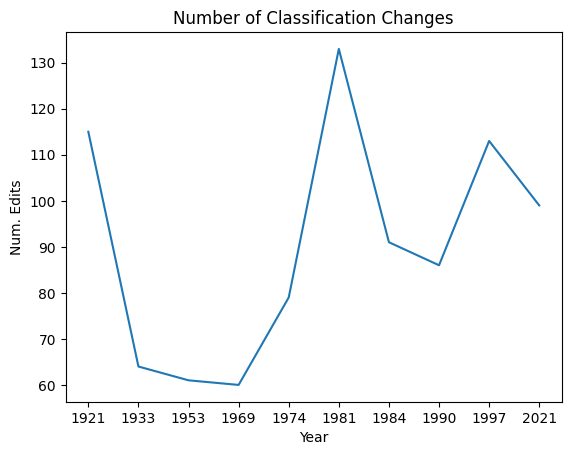

In [ ]:
# Question 2: Which year saw the largest number of changes to the classification?

classification_edits = []
for i in range(len(years)):
    if i < 10:
        edits = len(scottish_munros[scottish_munros[years[i]]!=scottish_munros[years[i+1]]])
        classification_edits.append(edits)
        #print(f"In {years[i+1]} there were {edits} edits made.")

plt.plot(years[1:],classification_edits)
plt.xlabel("Year")
plt.ylabel("Num. Edits")
plt.title("Number of Classification Changes")

# 1981 had the most changes, 134 of them.

# Question 3
Which Munro is the most remote?

I tackle the idea of "remoteness" in two ways, first by distances between the Munros themselves and second by human population centers. Both end up giving the same answer.

## Distance Remoteness

In [ ]:
# Convert scottish_munros to a geodataframe
geo_scottish_munros = gpd.GeoDataFrame(scottish_munros,geometry=gpd.points_from_xy(scottish_munros.xcoord,scottish_munros.ycoord),crs="EPSG:27700")

coords = []
for point in geo_scottish_munros.geometry:
    coords.append((point.x, point.y))

distance_matrix  = euclidean_distances(coords)
row_sums = np.sum(distance_matrix, axis=1) # the sum of pairwise euclidean distances for each munro 
scottish_munros["global_distance"] = row_sums
display(scottish_munros.sort_values("global_distance",ascending=False).head(10)) # Shows the ten farthest Munros from all other munros (global distance)

# In this case Ben Hope is the most isolated peak from all the other munros.

,DoBIH_number,Name,Height_m,Height_ft,xcoord,ycoord,1891,1921,1933,1953,1969,1974,1981,1984,1990,1997,2021,Comments,global_distance
574,1123,Ben Hope,927.0,3041.0,247750.0,950151.0,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,NaN,9.784355e+07
575,1165,Ben Klibreck - Meall nan Con,962.1,3156.0,258530.0,929921.0,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,1891: Ben Clibrig,8.728770e+07
576,1183,Ben More Assynt,998.0,3274.0,231830.0,920150.0,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,NaN,8.035322e+07
578,1184,Conival,987.0,3238.0,230330.0,919938.0,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,1891: Conamheall; 1921-1969: Cona-mheall (Coni...,8.024292e+07
577,1186,Ben More Assynt South Top,960.0,3150.0,232402.0,919289.0,Munro Top,Munro Top,Munro Top,Munro Top,Munro Top,Munro Top,Munro Top,Munro Top,Munro Top,Munro Top,Munro Top,NaN,7.987183e+07
602,1301,Ben More,966.0,3169.0,152576.0,733078.0,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,NaN,7.007721e+07
273,485,Mount Keen,939.0,3081.0,340905.0,786927.0,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,NaN,6.656336e+07
588,1245,Sgurr na Banachdich,965.0,3166.0,144046.0,822448.0,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,NaN,6.464327e+07
590,1256,Sgurr na Banachdich - Sgurr Thormaid,926.0,3038.0,144098.0,822633.0,NaN,Munro Top,Munro Top,Munro Top,Munro Top,Munro Top,Munro Top,Munro Top,Munro Top,Munro Top,Munro Top,NaN,6.464056e+07
589,1251,Sgurr na Banachdich Central Top,942.0,3091.0,144107.0,822292.0,NaN,Munro Top,Munro Top,Munro Top,Munro Top,Munro Top,Munro Top,Munro Top,Munro Top,Munro Top,Munro Top,1921-1974: Centre Top,6.459148e+07


## Population Remoteness

In [ ]:
# Scotland Country Boundary
# https://datashare.ed.ac.uk/bitstream/handle/10283/2409/Scotland_boundary.zip?sequence=1&isAllowed=y
scotland_boundary = gpd.read_file(f'Scotland_boundary/Scotland boundary.shp')
display(scotland_boundary.head())

# 2022 Census Output Area Population Weighted Centroids
# https://www.nrscotland.gov.uk/media/gm4dvdsv/output-area-2022-pwc.zip
scotland_population_centroids = gpd.read_file(f'output-area-2022-pwc/OutputArea2022_PWC/OutputArea2022_PWC.shp')
display(scotland_population_centroids.head())

,NAME,geometry
0,Scotland,"MULTIPOLYGON (((266004.4 543544.6, 266010.9 54..."


,code,HHcount,Popcount,council,masterpc,easting,northing,geometry
0,S00136472,61,64,S12000033,AB10 1BT,393865,806312,POINT (393865.088 806312.202)
1,S00136478,64,68,S12000033,AB10 1DA,393877,806296,POINT (393876.587 806295.963)
2,S00136558,62,105,S12000033,AB10 1DB,392813,805762,POINT (392813 805762)
3,S00136477,49,87,S12000033,AB10 1DH,393708,806213,POINT (393708.257 806213.465)
4,S00136331,47,75,S12000033,AB10 1FL,394238,806594,POINT (394238 806594)


In [ ]:
res_m = 1000  # grid resolution
minx, miny, maxx, maxy = scotland_boundary.total_bounds # scotland bounding box
xs = np.arange(minx, maxx + res_m, res_m)
ys = np.arange(miny, maxy + res_m, res_m)
X, Y = np.meshgrid(xs, ys) # meshgrid by resolution within the bounding box

# KDE - kernel density estimate, analogous to a histogram. 
# https://seaborn.pydata.org/generated/seaborn.kdeplot.html
x = scotland_population_centroids.geometry.x.to_numpy(dtype=float)
y = scotland_population_centroids.geometry.y.to_numpy(dtype=float)
pts = np.vstack((x, y))
bw_adjust = 1.5  # spreads density
kde = gaussian_kde(pts, bw_method=lambda s: s.scotts_factor() * bw_adjust, weights=scotland_population_centroids["Popcount"])
Z = kde(np.vstack([X.ravel(), Y.ravel()])).reshape(Y.shape)
Z = Z + 1e-15 # Small positive floor helps LogNorm visuals, even if lying a bit

# clip to Scotland 
union = scotland_boundary.geometry.union_all()
inside = shapely.covers(union, shapely.points(X.ravel(), Y.ravel())).reshape(Y.shape)
Z_masked = np.ma.array(Z, mask=~inside)

# Log normalize scale 
low_q, high_q = 0.02, 0.998  # clip ends so color scale isn’t dominated
zin = Z_masked.compressed()
vmin = max(np.quantile(zin, low_q), 1e-15)
vmax = np.quantile(zin, high_q)
norm = LogNorm(vmin=vmin, vmax=vmax)

# Estimate (interpolate) KDE points at Munro locations
Z_for_interp = Z_masked.filled(np.nan)  # NaN outside Scotland
interp = RegularGridInterpolator((ys, xs), Z_for_interp, bounds_error=False, fill_value=np.nan)
munro_xy = np.column_stack((geo_scottish_munros.geometry.x,geo_scottish_munros.geometry.y))
munro_vals = interp(np.column_stack((munro_xy[:, 1], munro_xy[:, 0]))) # RegularGridInterpolator needs y, x order

# Add values to GeoDataFrame
geo_scottish_munros["kde_value"] = munro_vals

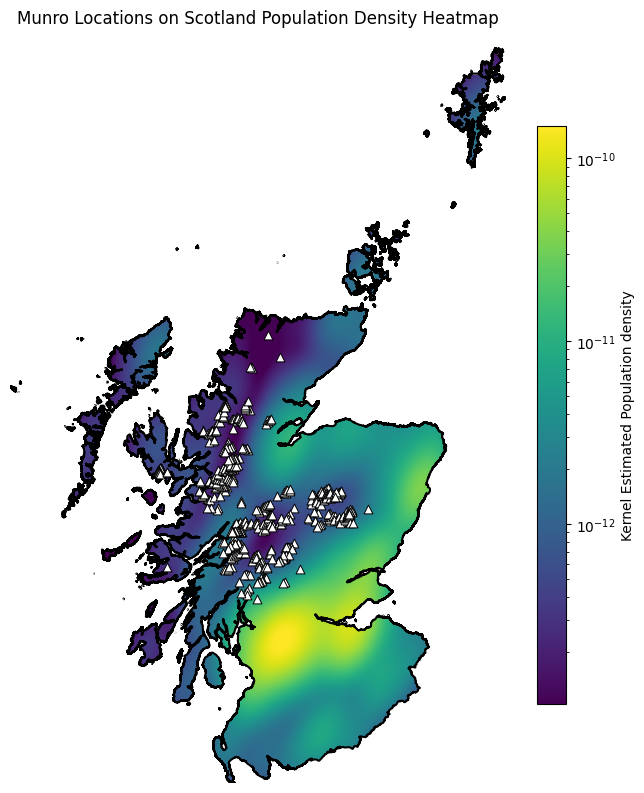

In [59]:
# Plot heatmap
fig, ax = plt.subplots(figsize=(8, 10))
im = ax.imshow(
    Z_masked,
    extent=(minx, maxx, miny, maxy),
    origin="lower",
    cmap="viridis",
    norm=norm
)

# Plot country boundary
scotland_boundary.boundary.plot(ax=ax, color="k")

# Plot munro locations
ax.scatter(
    munro_xy[:, 0], munro_xy[:, 1],
    s=40, marker="^", c="white",
    edgecolors="black", linewidths=0.7, zorder=3
)

ax.set_axis_off()
cbar = fig.colorbar(im, ax=ax, shrink=0.75, label="Kernel Estimated Population density")
plt.title("Munro Locations on Scotland Population Density Heatmap")
plt.show()

In [ ]:
# Convert probability density to magnitude of population per square km
total_pop = float(scotland_population_centroids["Popcount"].sum())
geo_scottish_munros["pp_km2"] = geo_scottish_munros["kde_value"] * total_pop * 1e6 # 1e6 = square km
display(geo_scottish_munros.sort_values("kde_value",ascending=True).head(10))
# more interpretable, Ben Hope is located in an area with the lowest estimated density with 0.43 people per square kilometer

,DoBIH_number,Name,Height_m,Height_ft,xcoord,ycoord,1891,1921,1933,1953,...,1974,1981,1984,1990,1997,2021,Comments,geometry,kde_value,pp_km2
574,1123,Ben Hope,927.0,3041.0,247750.0,950151.0,Munro,Munro,Munro,Munro,...,Munro,Munro,Munro,Munro,Munro,Munro,NaN,POINT (247750 950151),8.084705e-14,0.431090
484,890,Maoile Lunndaidh,1004.9,3297.0,213506.0,845853.0,Munro,Munro Top,Munro Top,Munro Top,...,Munro Top,Munro,Munro,Munro,Munro,Munro,1891: Maoile Lunndaich. Made the Munro even th...,POINT (213506 845853),1.063516e-13,0.567085
485,891,Maoile Lunndaidh - Creag Toll a' Choin,1005.3,3298.0,213082.0,845325.0,Munro Top,Munro,Munro,Munro,...,Munro,NaN,NaN,NaN,NaN,NaN,1891: see above. Munro returned to Maoile Lunn...,POINT (213082 845325),1.070661e-13,0.570895
503,934,An Riabhachan West Top,1038.0,3406.0,211733.0,833774.0,Munro Top,Munro Top,Munro Top,Munro Top,...,Munro Top,Munro Top,Munro Top,Munro Top,Munro Top,Munro Top,NaN,POINT (211733 833774),1.083591e-13,0.577790
486,893,Maoile Lunndaidh - Carn nam Fiaclan,993.0,3258.0,212370.0,845504.0,Munro Top,Munro Top,Munro Top,Munro Top,...,Munro Top,Munro Top,Munro Top,Munro Top,Munro Top,Munro Top,NaN,POINT (212370 845504),1.087619e-13,0.579937
502,930,An Riabhachan SW Top,1086.0,3563.0,212286.0,833617.0,NaN,NaN,NaN,NaN,...,NaN,Munro Top,Munro Top,Munro Top,Munro Top,Munro Top,NaN,POINT (212286 833617),1.092784e-13,0.582691
504,931,An Socach,1069.0,3507.0,210061.0,833274.0,Munro,Munro,Munro,Munro,...,Munro,Munro,Munro,Munro,Munro,Munro,NaN,POINT (210061 833274),1.106680e-13,0.590101
500,927,An Riabhachan,1129.0,3704.0,213363.0,834483.0,Munro,NaN,Munro,Munro,...,Munro,Munro,Munro,Munro,Munro,Munro,NaN,POINT (213363 834483),1.119958e-13,0.597181
577,1186,Ben More Assynt South Top,960.0,3150.0,232402.0,919289.0,Munro Top,Munro Top,Munro Top,Munro Top,...,Munro Top,Munro Top,Munro Top,Munro Top,Munro Top,Munro Top,NaN,POINT (232402 919289),1.126570e-13,0.600707
501,928,An Riabhachan NE Top,1125.0,3691.0,213824.0,834761.0,NaN,Munro,NaN,NaN,...,NaN,Munro Top,Munro Top,Munro Top,NaN,NaN,NaN,POINT (213824 834761),1.142254e-13,0.609070
